<a href="https://colab.research.google.com/github/Prajwalrajm/MSc-Project-ML-Regression-Model/blob/master/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Pandas Library**

In [0]:
import pandas as pd

**Mounting Google Drive to access data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read data from Drive**

In [0]:
xgboost =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mileage_data.csv')

In [4]:
xgboost.shape

(241310, 4)

**Converting Categorical values in 'One Hot Encoding'**

In [0]:
xgboost_onehot = pd.get_dummies(xgboost)

In [7]:
xgboost_onehot.columns

Index(['TIS', 'Model_year', 'mileage', 'model_line_C/2D', 'model_line_C/2H',
       'model_line_C/2R', 'model_line_C/2Z', 'model_line_C/4N',
       'model_line_T/3A', 'model_line_T/3B', 'model_line_T/3D',
       'model_line_T/4A', 'model_line_T/LH', 'model_line_T/LK',
       'model_line_T/LS', 'model_line_T/LX'],
      dtype='object')

**Creating X and Y co-efficient**

In [0]:
X =  xgboost_onehot[['TIS', 'Model_year', 'model_line_C/2D', 'model_line_C/2H',
       'model_line_C/2R', 'model_line_C/2Z', 'model_line_C/4N',
       'model_line_T/3A', 'model_line_T/3B', 'model_line_T/3D',
       'model_line_T/4A', 'model_line_T/LH', 'model_line_T/LK',
       'model_line_T/LS', 'model_line_T/LX']].values
y = xgboost_onehot['mileage'].values

**Splitting dataset into train and test sets**

In [0]:
#Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Model Section (XGBOOST) and Fit**

In [19]:
from sklearn import ensemble

params = {'n_estimators': 600, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

**Prediction**

In [0]:
y_pred_xgboost = clf.predict(X_test)

**Calculating 'Root Mean squeared Error'**

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_xgboost)
rmse = np.sqrt(mse)

print(rmse)

4694.232671682608


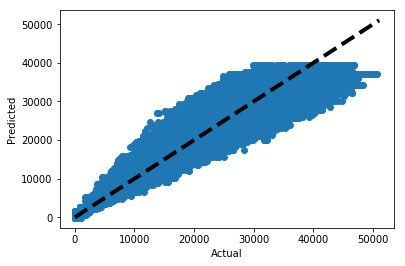

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_xgboost)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [0]:
compare_xgboost_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgboost})

In [24]:
compare_xgboost_predict.head()

,Actual,Predicted
0,10398,10394.533544
1,17445,18531.686677
2,31471,35846.593611
3,19994,27004.045431
4,25977,28158.158392
